In [2]:
!pip install mplsoccer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 2.9 MB/s eta 0:00:00


In [65]:
from mplsoccer import Sbopen
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mplsoccer import Pitch, Sbopen, VerticalPitch
import os
from urllib.request import urlopen
from mplsoccer import PyPizza, add_image, FontManager
from PIL import Image
import matplotlib.patheffects as path_effects



parser = Sbopen()


In [36]:
#opening data using competition method
df_competition = parser.competition()
#structure of data
df_competition

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2023-08-17T23:51:11.837478,None,None,2023-08-17T23:51:11.837478
1,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
2,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
3,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
...,...,...,...,...,...,...,...,...,...,...,...,...
62,55,43,Europe,UEFA Euro,male,False,True,2020,2023-02-24T21:26:47.128979,2023-04-27T22:38:34.970148,2023-04-27T22:38:34.970148,2023-02-24T21:26:47.128979
63,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2023-06-18T19:28:39.443883,2021-06-13T16:17:31.694,None,2023-06-18T19:28:39.443883
64,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2023-07-17T21:19:03.032991,2023-07-17T21:21:56.497106,2023-07-17T21:21:56.497106,2023-07-17T21:19:03.032991
65,72,107,International,Women's World Cup,female,False,True,2023,2023-09-01T12:34:19.705316,2023-09-01T12:35:45.762196,2023-09-01T12:35:45.762196,2023-09-01T12:34:19.705316


In [37]:
matches=parser.match(competition_id=43, season_id=106).head(100)
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   match_id                         64 non-null     int64         
 1   match_date                       64 non-null     datetime64[ns]
 2   kick_off                         64 non-null     datetime64[ns]
 3   home_score                       64 non-null     int64         
 4   away_score                       64 non-null     int64         
 5   match_status                     64 non-null     object        
 6   match_status_360                 64 non-null     object        
 7   last_updated                     64 non-null     datetime64[ns]
 8   last_updated_360                 64 non-null     datetime64[ns]
 9   match_week                       64 non-null     int64         
 10  competition_id                   64 non-null     int64         


In [38]:
team = 'Argentina'

# Use the '|' operator to combine the two conditions
arg_match_ids = matches.loc[(matches['home_team_name'] == team) | (matches['away_team_name'] == team)]
arg_match_ids

,match_id,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,...,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name
1,3869151,2022-12-03,2022-12-03 21:00:00,2,1,available,available,2023-07-30 07:46:05.382784,2023-07-30 07:48:51.865595,4,...,33,Round of 16,1000793,Ahmad bin Ali Stadium,185,Qatar,367.0,Szymon Marciniak,182.0,Poland
6,3869321,2022-12-09,2022-12-09 21:00:00,2,2,available,available,2023-03-30 20:22:22.475740,2023-06-21 17:51:12.511460,5,...,11,Quarter-finals,1001114,Lusail Stadium,185,Qatar,180.0,Antonio Miguel Mateu Lahoz,214.0,Spain
9,3869685,2022-12-18,2022-12-18 17:00:00,3,3,available,available,2023-02-20 07:27:19.374380,2023-08-17 15:55:15.164685,7,...,26,Final,1001114,Lusail Stadium,185,Qatar,367.0,Szymon Marciniak,182.0,Poland
11,3857264,2022-11-30,2022-11-30 21:00:00,0,2,available,available,2023-07-25 08:24:09.695404,2023-07-25 09:10:13.832053,3,...,10,Group Stage,1001115,Stadium 974,185,Qatar,293.0,Danny Desmond Makkelie,160.0,Netherlands
13,3857289,2022-11-26,2022-11-26 21:00:00,2,0,available,available,2023-02-08 14:48:48.516858,2023-06-20 11:57:08.547882,2,...,10,Group Stage,1001114,Lusail Stadium,185,Qatar,269.0,Daniele Orsato,112.0,Italy
19,3869519,2022-12-13,2022-12-13 21:00:00,3,0,available,available,2023-04-19 06:53:52.197711,2023-04-26 22:32:37.808359,6,...,15,Semi-finals,1001114,Lusail Stadium,185,Qatar,269.0,Daniele Orsato,112.0,Italy
37,3857300,2022-11-22,2022-11-22 12:00:00,1,2,available,available,2023-06-18 15:28:07.620153,2023-06-19 15:59:46.628887,1,...,10,Group Stage,1001114,Lusail Stadium,185,Qatar,943.0,Slavko Vinčić,208.0,Slovenia


In [39]:
# Assuming you have a match_id, let's say 3869685
match_id = 3869519

# Retrieve the lineups for the specified match_id using the parser
lineups = parser.lineup(match_id=match_id)

lineups

,player_id,player_name,player_nickname,jersey_number,match_id,team_id,team_name,country_id,country_name
0,2995,Ángel Fabián Di María Hernández,Ángel Di María,11,3869519,779,Argentina,11,Argentina
1,3090,Nicolás Hernán Otamendi,Nicolás Otamendi,19,3869519,779,Argentina,11,Argentina
2,5503,Lionel Andrés Messi Cuccittini,Lionel Messi,10,3869519,779,Argentina,11,Argentina
3,5507,Nicolás Alejandro Tagliafico,Nicolás Tagliafico,3,3869519,779,Argentina,11,Argentina
4,5743,Paulo Bruno Exequiel Dybala,Paulo Dybala,21,3869519,779,Argentina,11,Argentina
5,6312,Franco Armani,Franco Armani,1,3869519,779,Argentina,11,Argentina
6,6377,Ángel Martín Correa,Ángel Correa,15,3869519,779,Argentina,11,Argentina
7,6694,Gerónimo Rulli,Gero Rulli,12,3869519,779,Argentina,11,Argentina
8,6909,Damián Emiliano Martínez,Emiliano Martínez,23,3869519,779,Argentina,11,Argentina
9,7161,Germán Alejandro Pezzella,Germán Pezzella,6,3869519,779,Argentina,11,Argentina


In [68]:
#opening data
df_event, df_related, df_freeze, df_tactics = parser.event(3869519)
df_event.info()
df_event.head(20)
df_event.columns
df_event

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3806 entries, 0 to 3805
Data columns (total 77 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3806 non-null   object 
 1   index                           3806 non-null   int64  
 2   period                          3806 non-null   int64  
 3   timestamp                       3806 non-null   object 
 4   minute                          3806 non-null   int64  
 5   second                          3806 non-null   int64  
 6   possession                      3806 non-null   int64  
 7   duration                        2786 non-null   float64
 8   match_id                        3806 non-null   int64  
 9   type_id                         3806 non-null   int64  
 10  type_name                       3806 non-null   object 
 11  possession_team_id              3806 non-null   int64  
 12  possession_team_name            38

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,shot_first_time,dribble_overrun,ball_recovery_offensive,substitution_replacement_id,substitution_replacement_name,pass_no_touch,injury_stoppage_in_chain,pass_cut_back,pass_miscommunication,pass_goal_assist
0,7bce2bb7-7f9a-425b-baa6-b00a53ac7fd9,1,1,00:00:00,0,0,1,0.000000,3869519,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,202afec8-41eb-46e4-95ac-96eda6e8100f,2,1,00:00:00,0,0,1,0.000000,3869519,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7232ed2d-529b-4640-8cfb-fe798ea9e0f5,3,1,00:00:00,0,0,1,0.000000,3869519,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f60038fb-1fa5-42d8-9725-13261620e3bd,4,1,00:00:00,0,0,1,0.000000,3869519,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,794e7ac9-2535-4503-83f4-92c612c0ed78,5,1,00:00:00.423000,0,0,2,1.599438,3869519,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3801,a4b4456a-5df1-4ca6-8c5f-6943bb8c5156,3802,2,00:49:51.752000,94,51,184,1.792528,3869519,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3802,3dabf30e-401c-49ad-8976-4b124b1b7a6c,3803,2,00:49:53.545000,94,53,184,1.062937,3869519,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3803,0914f9ae-833d-4368-aa86-9ea75c0f22cd,3804,2,00:49:54.608000,94,54,184,0.000000,3869519,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3804,29b6a94d-43b9-40b4-b9de-b6a012d216aa,3805,2,00:50:02.128000,95,2,184,0.000000,3869519,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
# Filter events where a shot's outcome is "Goal"
goal_events = df_event[(df_event['type_name'] == 'Shot') & (df_event['outcome_name'] == 'Goal')]

# Display information about goal events
goal_events.info()

# Display the first 100 rows of goal events (you can adjust the number as needed)
print(goal_events.head(20))



<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 1442 to 2981
Data columns (total 78 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3 non-null      object 
 1   index                           3 non-null      int64  
 2   period                          3 non-null      int64  
 3   timestamp                       3 non-null      object 
 4   minute                          3 non-null      int64  
 5   second                          3 non-null      int64  
 6   possession                      3 non-null      int64  
 7   duration                        3 non-null      float64
 8   match_id                        3 non-null      int64  
 9   type_id                         3 non-null      int64  
 10  type_name                       3 non-null      object 
 11  possession_team_id              3 non-null      int64  
 12  possession_team_name            3 

In [92]:
player_name = 'Julián Álvarez'
player_filter = (df_event.type_name == 'Pass') & (df_event.player_name == player_name)
df_pass = df_event.loc[player_filter, ['x', 'y', 'end_x', 'end_y', 'outcome_name']]
mask_complete = df_pass.outcome_name.isnull()
df_pass.head(30)
#non_penalty_goals_by_julian = df_event[player_filter]
#non_penalty_goals_by_julian
#complete_passes = df_pass[~mask_complete]  # Note the '~' to negate the mask
#complete_passes.head(30)

,x,y,end_x,end_y,outcome_name
173,40.4,53.3,39.4,49.5,Incomplete
658,99.2,4.8,89.9,16.0,NaN
890,56.7,42.8,51.2,34.3,NaN
995,94.7,50.9,88.2,47.2,NaN
1027,90.5,21.6,90.2,29.6,NaN
1033,91.1,24.4,107.6,29.9,Incomplete
1288,110.4,0.1,108.0,4.8,NaN
1292,96.4,5.1,89.9,16.2,NaN
1489,52.6,47.7,94.7,55.4,Incomplete
1541,52.0,35.7,52.5,44.2,NaN


In [ ]:
# Specify the player's name
#player_name = 'Julián Álvarez'

# Create a boolean mask to filter events for the specified player
#player_filter = df_event['player_name'] == player_name

# Apply the mask to filter the DataFrame
#player_data = df_event[player_filter]

# Now, the player_data DataFrame contains data only for 'Julián Álvarez'
#player_data


,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,foul_committed_card_id,foul_committed_card_name,ball_recovery_offensive,shot_one_on_one,foul_committed_advantage,foul_won_advantage,block_offensive,foul_committed_offensive,bad_behaviour_card_id,bad_behaviour_card_name
101,9b0d1d30-13b1-4cda-9ebf-b33a46b30b1a,102,1,00:02:30.169000,2,30,8,NaN,3869685,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,b8d55d4b-37dc-4491-ad9c-baa235eec9df,189,1,00:04:38.391000,4,38,14,0.989084,3869685,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,385d5740-cb94-4103-bda7-89e7d3eafc57,285,1,00:06:39.250000,6,39,16,2.959877,3869685,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
288,e03bf54e-7bb7-4de0-bc65-05a64f58f25a,289,1,00:06:42.307000,6,42,16,0.000000,3869685,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
293,ba0bc0e4-8435-48b1-92d1-968e9af6596c,294,1,00:06:55.560000,6,55,17,0.330718,3869685,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3781,f14c30db-9f1a-454c-92a2-706589b61aac,3781,3,00:08:58.405000,98,58,212,1.526857,3869685,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3785,8843c3db-5129-4f70-a3c1-0e8a5342ad12,3785,3,00:09:03.037000,99,3,212,NaN,3869685,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3786,8f106018-e106-49ba-a5fc-f8324204eebc,3786,3,00:09:03.037000,99,3,212,4.324054,3869685,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3788,061b0f93-c15e-44e0-91c3-3a61d49ebe51,3788,3,00:09:07.361000,99,7,212,0.000000,3869685,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


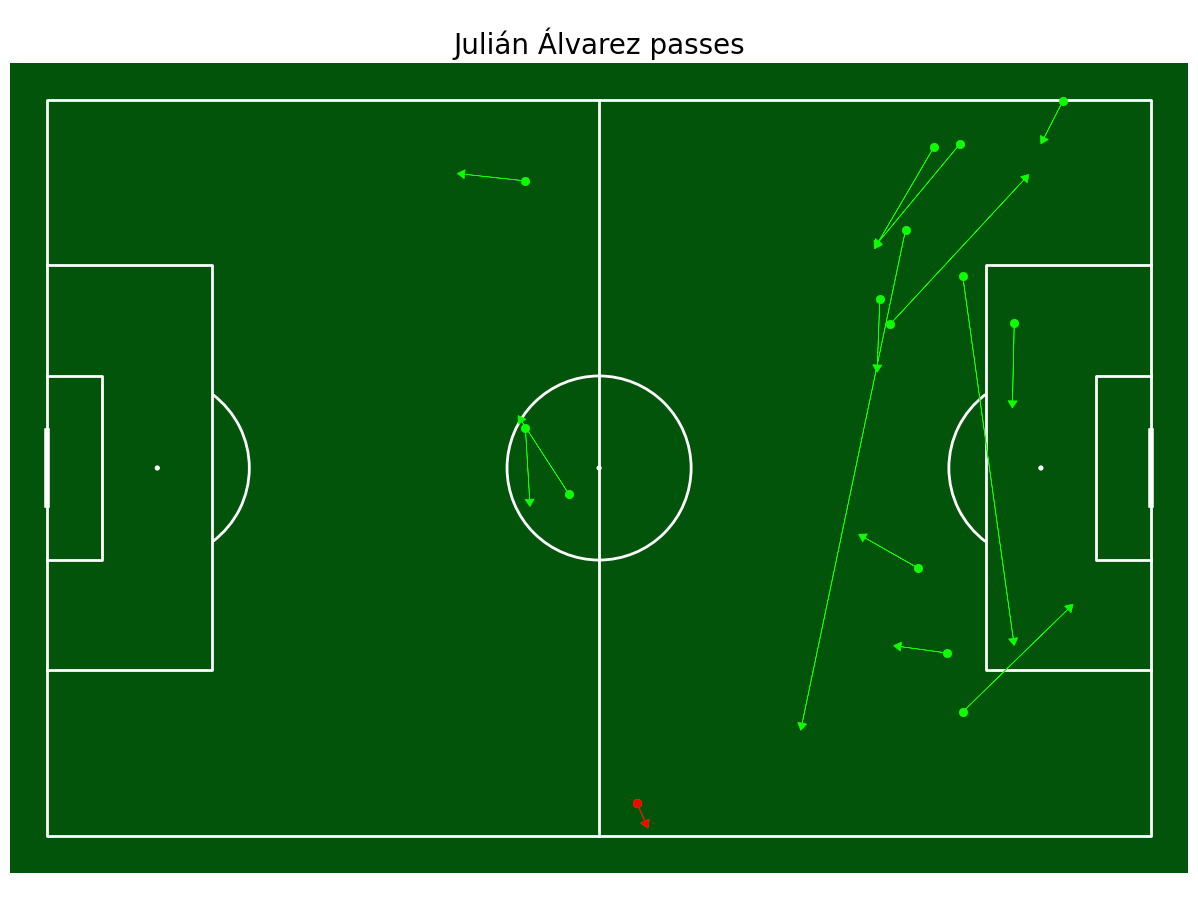

In [93]:
pitch = Pitch(line_color='white',pitch_color='#02540b')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,endnote_height=0.04, title_space=0, endnote_space=0)
for i in df_pass.index:
  x = df_pass['x'][i]
  y = df_pass['y'][i]
  dx = df_pass['end_x'][i] - df_pass['x'][i]
  dy = df_pass['end_y'][i] - df_pass['y'][i]
  if df_event['outcome_name'][i] != 'Incomplete':
    ax['pitch'].arrow(x,y,dx,dy,color='#0dff00',length_includes_head=True,head_width=1,head_length=0.8)
    pitch.scatter(df_pass['x'][i],df_pass['y'][i],color='#0dff00',ax=ax['pitch'])

else:
  ax['pitch'].arrow(x,y,dx,dy,color='red',length_includes_head=True,head_width=1,head_length=0.8)
  pitch.scatter(df_pass['x'][i],df_pass['y'][i],color='red',ax=ax['pitch'])
  fig.suptitle(player_name+" passes", fontsize = 20)

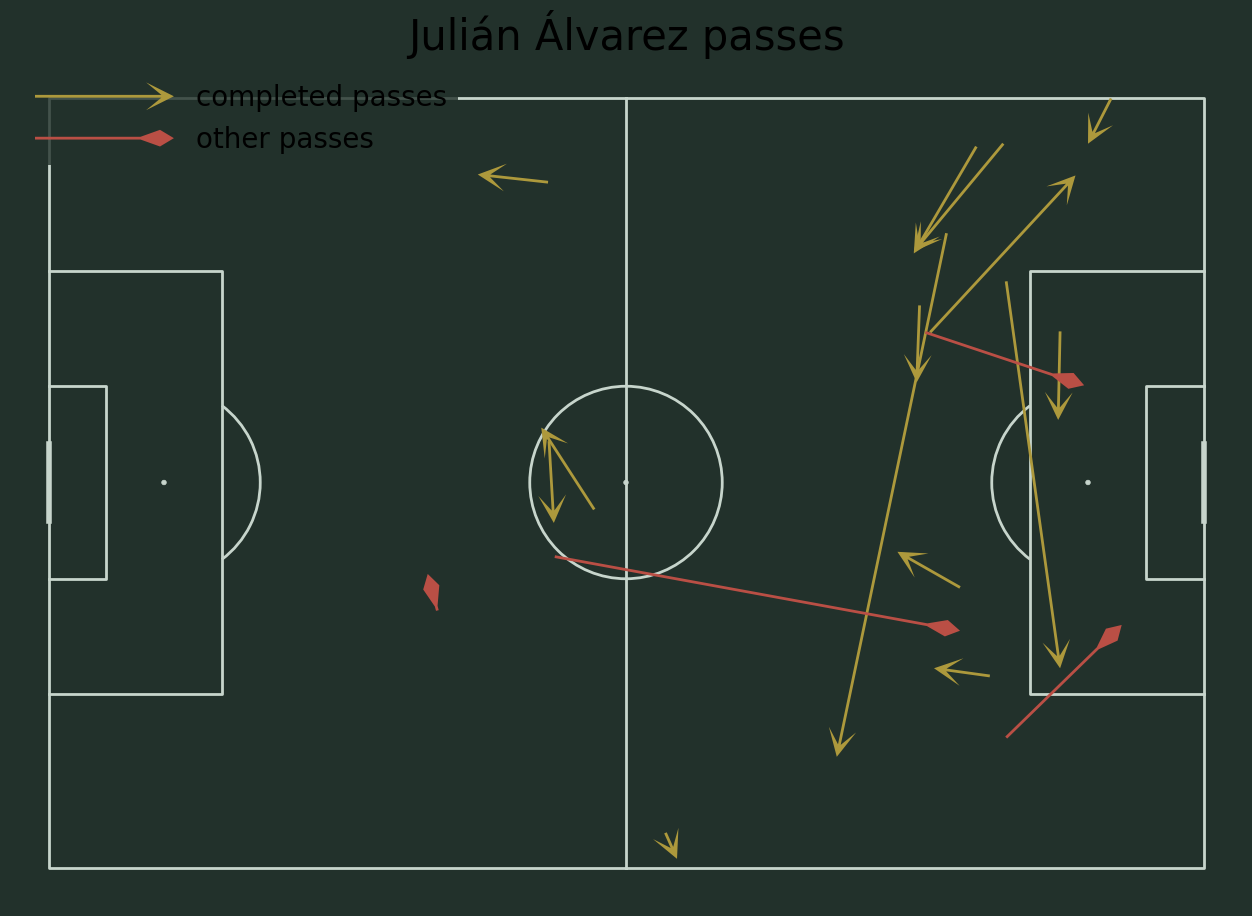

In [94]:
# Set up the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')

# Plot the completed passes
pitch.arrows(df_pass[mask_complete].x, df_pass[mask_complete].y,
             df_pass[mask_complete].end_x, df_pass[mask_complete].end_y, width=2,
             headwidth=10, headlength=10, color='#ad993c', ax=ax, label='completed passes')

# Plot the other passes
pitch.arrows(df_pass[~mask_complete].x, df_pass[~mask_complete].y,
             df_pass[~mask_complete].end_x, df_pass[~mask_complete].end_y, width=2,
             headwidth=6, headlength=5, headaxislength=12,
             color='#ba4f45', ax=ax, label='other passes')

# Set up the legend
ax.legend(facecolor='#22312b', handlelength=5, edgecolor='None', fontsize=20, loc='upper left')

# Set the title
ax_title = ax.set_title(f'{player_name} passes', fontsize=30)

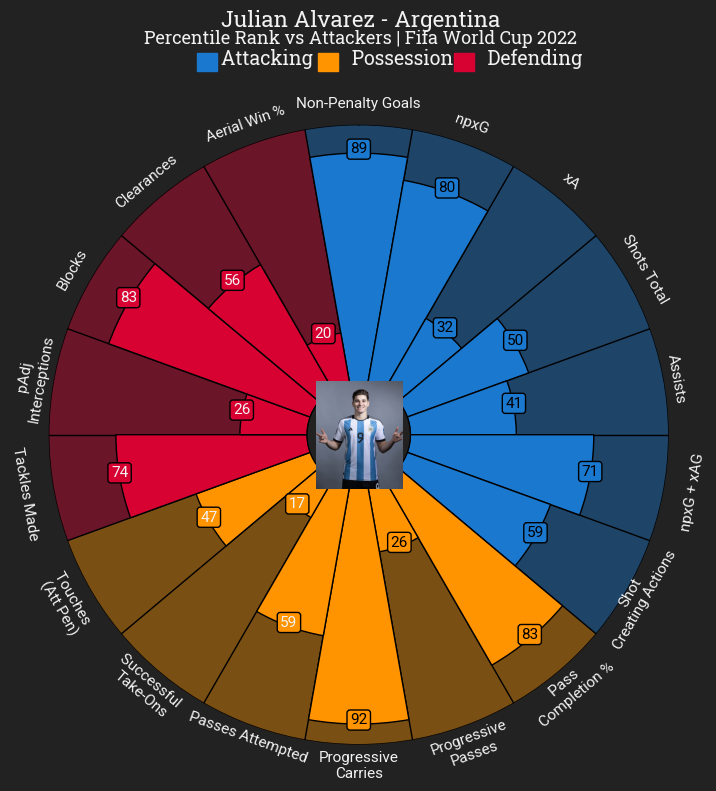

In [23]:
params = ["Non-Penalty Goals", "npxG", "xA", "Shots Total", "\nAssists",
          "\n npxG + xAG", "Shot\nCreating Actions\n", "Pass \nCompletion %", "Progressive\nPasses",
          "Progressive\nCarries", "Passes Attempted\n", "\nSuccessful \nTake-Ons\n","\nTouches \n(Att Pen)",
          "\nTackles Made", "pAdj\nInterceptions", "Blocks", "Clearances", "Aerial Win %"]

font_normal = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/roboto/'
                          'Roboto%5Bwdth,wght%5D.ttf')
font_italic = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/roboto/'
                          'Roboto-Italic%5Bwdth,wght%5D.ttf')
font_bold = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
                        'RobotoSlab%5Bwght%5D.ttf')

# Specify the path to the image file in your local folder
image_path = "julian_alvarez.jpg"  # Replace with the actual file path

# Open the image from the local folder
fdj_cropped = Image.open(image_path)

values = [89, 80, 32, 50, 41, 71, 59, 83, 26, 92, 59, 17, 47, 74, 26,83,56,20]

# color for the slices and text
slice_colors = ["#1A78CF"] * 7 + ["#FF9300"] * 6 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 8


# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#222222",     # background color
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_color="#000000",    # color for last line
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(8, 8.5),                # adjust the figsize according to your need
    color_blank_space="same",        # use the same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#000000", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal.prop, va="center"
    ),                               # values to be used when adding parameter labels
    kwargs_values=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values labels
)

# add title
fig.text(
    0.515, 0.975, "Julian Alvarez - Argentina", size=16,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)

# add subtitle
fig.text(
    0.515, 0.955,
    "Percentile Rank vs Attackers | Fifa World Cup 2022",
    size=13,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)




# add text
fig.text(
    0.34, 0.93, "Attacking        Possession       Defending", size=14,
    fontproperties=font_bold.prop, color="#F2F2F2"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
        transform=fig.transFigure, figure=fig
    ),
])

# add image
ax_image = add_image(
    fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
)   # these values might differ when you are plotting

plt.show()

In [58]:
plt.style.use('ggplot')

SHOT_ID = ' dcc38d2c-1610-4362-bb0c-2fd6aa28c5bf'
df_freeze_frame = df_freeze[df_freeze.id == SHOT_ID].copy()
df_shot_event = df_event[df_event.id == SHOT_ID].dropna(axis=1, how='all').copy()

# add the jersey number
df_freeze_frame = df_freeze_frame.merge(lineups, how='left', on='player_id')

df_shot_event.columns

Index([], dtype='object')

In [54]:
# Identify the teams playing
team1 = df_event['possession_team_name'].iloc[0]
team2 = list(set(df_event['possession_team_name'].unique()) - {team1})[0]

print("Team 1:", team1)
print("Team 2:", team2)


Team 1: Argentina
Team 2: Croatia


In [60]:
# strings for team names
team1 = 'Argentina'
team2 = 'Crotia'


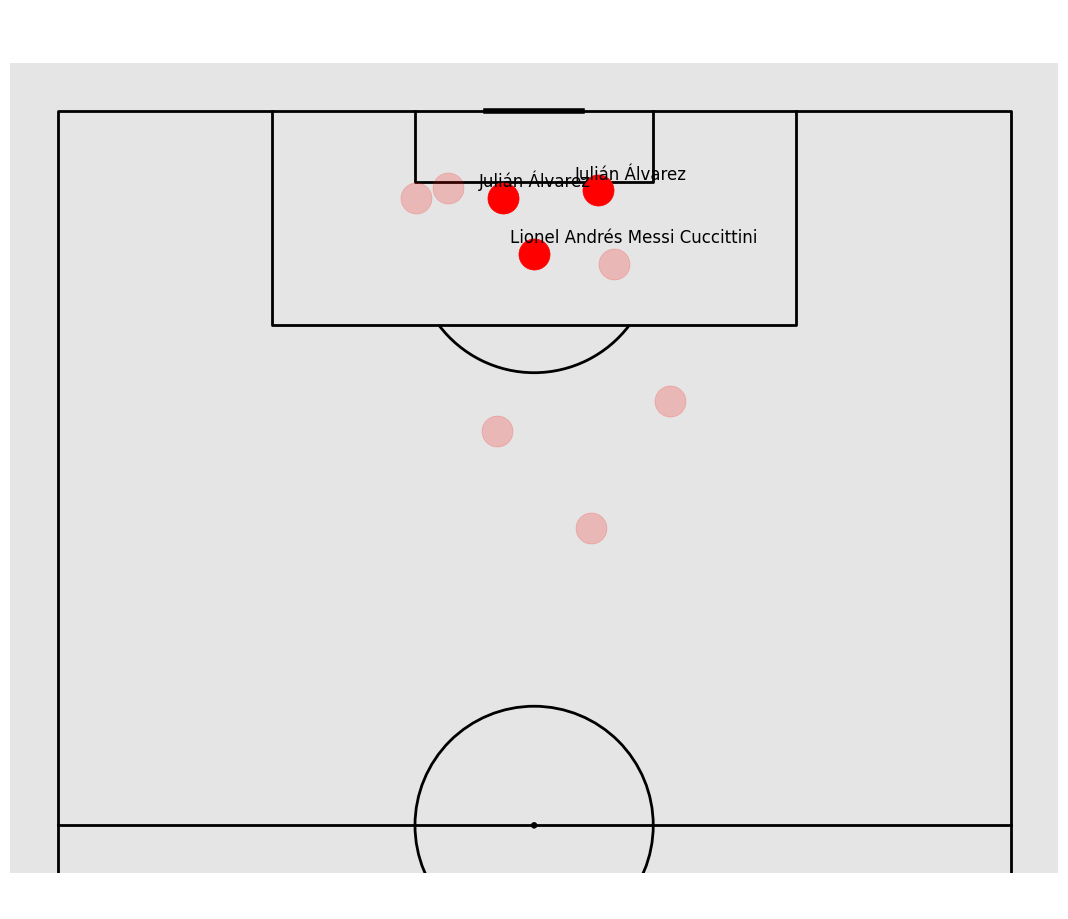

In [62]:
#create pitch
pitch = VerticalPitch(line_color='black', half = True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#query
mask_argentina= (df_event.type_name == 'Shot') & (df_event.team_name == team1)
#finding rows in the df and keeping only necessary columns
df_arg = df_event.loc[mask_argentina, ['x', 'y', 'outcome_name', "player_name"]]

#plot them - if shot ended with Goal - alpha 1 and add name
#for Argentina
for i, row in df_arg.iterrows():
    if row["outcome_name"] == 'Goal':
    #make circle
       pitch.scatter(row.x, row.y, alpha = 1, s = 500, color = "red", ax=ax['pitch'])
       pitch.annotate(row["player_name"], (row.x + 1, row.y - 2), ax=ax['pitch'], fontsize = 12)
    else:
       pitch.scatter(row.x, row.y, alpha = 0.2, s = 500, color = "red", ax=ax['pitch'])



In [63]:
#our team
team = "Argentina"
#get list of games by our team, either home or away
match_ids = matches.loc[(matches["home_team_name"] == team) | (matches["away_team_name"] == team)]["match_id"].tolist()
#calculate number of games
no_games = len(match_ids)


#declare an empty dataframe
danger_passes = pd.DataFrame()
for idx in match_ids:
    #open the event data from this game
    df = parser.event(idx)[0]
    for period in [1, 2]:
        #keep only accurate passes by England that were not set pieces in this period
        mask_pass = (df.team_name == team) & (df.type_name == "Pass") & (df.outcome_name.isnull()) & (df.period == period) & (df.sub_type_name.isnull())
        #keep only necessary columns
        passes = df.loc[mask_pass, ["x", "y", "end_x", "end_y", "minute", "second", "player_name"]]
        #keep only Shots by England in this period
        mask_shot = (df.team_name == team) & (df.type_name == "Shot") & (df.period == period)
        #keep only necessary columns
        shots = df.loc[mask_shot, ["minute", "second"]]
        #convert time to seconds
        shot_times = shots['minute']*60+shots['second']
        shot_window = 15
        #find starts of the window
        shot_start = shot_times - shot_window
        #condition to avoid negative shot starts
        shot_start = shot_start.apply(lambda i: i if i>0 else (period-1)*45)
        #convert to seconds
        pass_times = passes['minute']*60+passes['second']
        #check if pass is in any of the windows for this half
        pass_to_shot = pass_times.apply(lambda x: True in ((shot_start < x) & (x < shot_times)).unique())

        #keep only danger passes
        danger_passes_period = passes.loc[pass_to_shot]
        #concatenate dataframe with a previous one to keep danger passes from the whole tournament
        danger_passes = pd.concat([danger_passes, danger_passes_period], ignore_index = True)

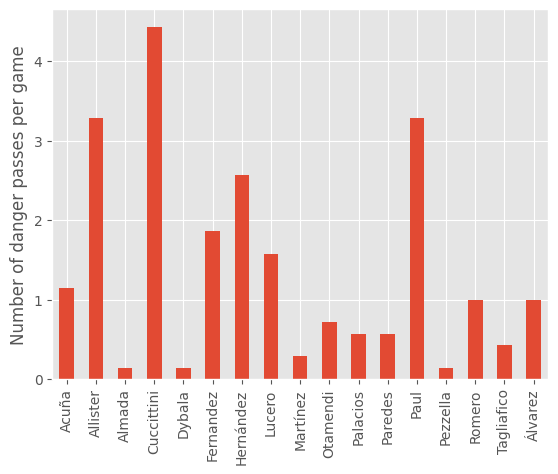

In [64]:
#keep only surnames
danger_passes["player_name"] = danger_passes["player_name"].apply(lambda x: str(x).split()[-1])
#count passes by player and normalize them
pass_count = danger_passes.groupby(["player_name"]).x.count()/no_games
#make a histogram
ax = pass_count.plot.bar(pass_count)
#make legend
ax.set_xlabel("")
ax.set_ylabel("Number of danger passes per game")
plt.show()

In [79]:
passes = df_event.loc[df_event['type_name'] == 'Pass'].loc[df_event['sub_type_name'] != 'Throw-in'].set_index('id')

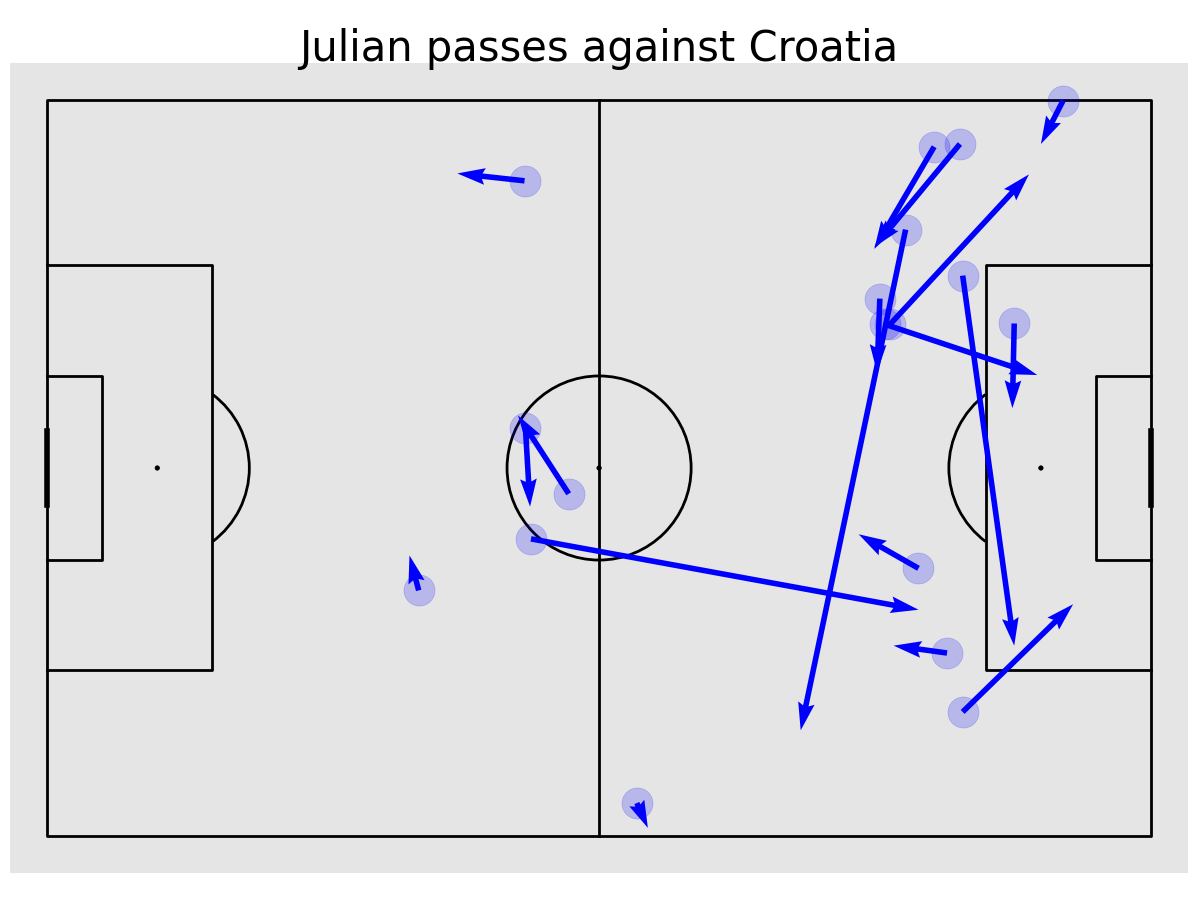

In [89]:
mask_bronze = (df_event.type_name == 'Pass') & (df_event.player_name == "Julián Álvarez")
df_pass = df_event.loc[mask_bronze, ['x', 'y', 'end_x', 'end_y']]

pitch = Pitch(line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pitch.arrows(df_pass.x, df_pass.y,
            df_pass.end_x, df_pass.end_y, color = "blue", ax=ax['pitch'])
pitch.scatter(df_pass.x, df_pass.y, alpha = 0.2, s = 500, color = "blue", ax=ax['pitch'])
fig.suptitle("Julian passes against Croatia", fontsize = 30)
plt.show()